# CHECKPOINT

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Thus, the objective is to build and train a ML model to estimate the energy consumed 
# by different 5G base stations taking into consideration the impact of various engineering configurations, 
# traffic conditions, and energy-saving methods.

#UNDERSTANDING MY DATASET.

UNDERSTANDING THE DATASET

In [5]:
data=pd.read_csv("5G_energy_consumption_dataset.csv")
data.head(3)

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719


In [6]:
data.tail(4)

,Time,BS,Energy,load,ESMODE,TXpower
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859
92628,20230102 230000,B_1018,13.303438,0.048173,0.0,7.325859


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [8]:
data.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [9]:
data.columns

Index(['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower'], dtype='object')

In [10]:
bus_stations=data.BS.nunique()
print(f"there are {bus_stations} bus stations")

there are 923 bus stations


In [11]:
data.shape

(92629, 6)

In [12]:
# plot a correlational matrix on numeric columns
import seaborn as sns

<Axes: >

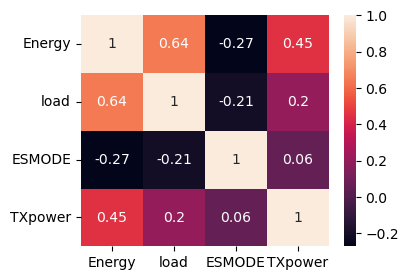

In [13]:
correlations=data.corr(numeric_only=True)
plt.figure(figsize=(4,3))
sns.heatmap(correlations,annot=True)

PERFOMING EDA ON THE DATA SET

# UNIVARIETE ANALYSIS ON THE COLUMNS 

In [16]:
top_10_bs=data.BS.value_counts().sort_values(ascending=False)
top_10_bs[:10]

BS
B_583    130
B_728    128
B_669    128
B_261    128
B_512    126
B_26     126
B_168    125
B_733    124
B_160    124
B_777    124
Name: count, dtype: int64

In [17]:
data.columns

Index(['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower'], dtype='object')

In [18]:
# histogram to show the frequency of energy at a perticular amount 

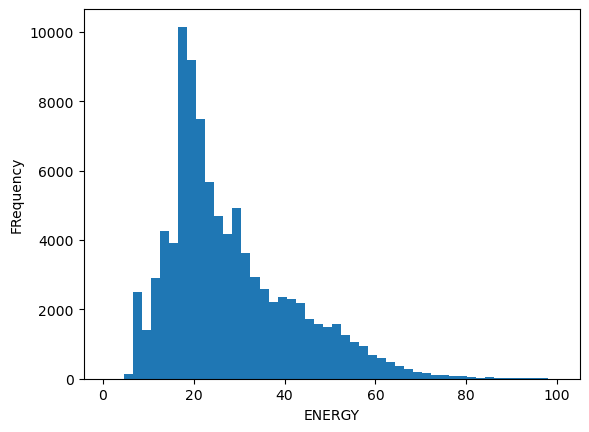

In [19]:
plt.hist(data.Energy,bins=50)
plt.xlabel("ENERGY")
plt.ylabel("FRequency")
plt.show()

In [ ]:
#BIVARIETE ANALYSIS

# BIVARIETE ANALYSIS ON THE LOAD AND ENERGY 

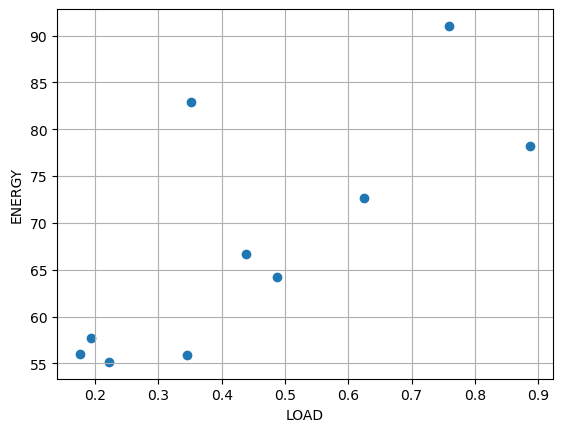

In [22]:
plt.scatter(data.load.values[:10],data.Energy.values[:10])
plt.xlabel("LOAD")
plt.ylabel("ENERGY")
plt.grid()
plt.show()

In [23]:
on_esmode=data["ESMODE"]>0
off_esmode=data["ESMODE"]==0
print("when esmode is off")
off_esmode.sum()

when esmode is off


87475

In [24]:
print("when esmode is on ")
on_esmode.sum()

when esmode is on 


5154

In [25]:
'''TXpower: This likely stands for "Transmission Power," which is the power used by the base station or device to transmit signals.'''

'TXpower: This likely stands for "Transmission Power," which is the power used by the base station or device to transmit signals.'

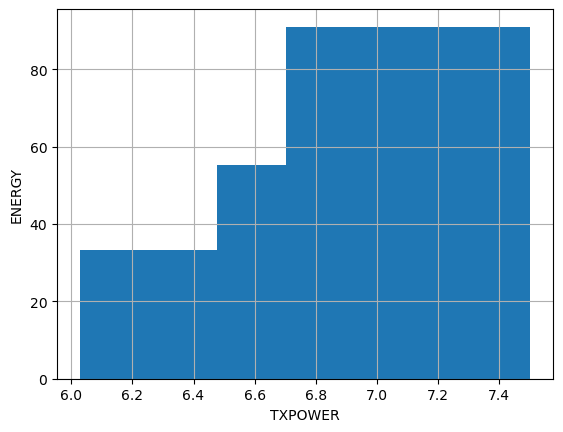

In [26]:
plt.bar(data.TXpower.values[:1000],data.Energy.values[:1000])
plt.xlabel("TXPOWER")
plt.ylabel("ENERGY")
plt.grid()

#FEATURE ENGINEERING AND FEATURE SELECTION ON MY DATA SET

# FEATURE ENGINEERING AND SELECTION

In [28]:
data.columns

Index(['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower'], dtype='object')

In [29]:
#Selecting relevant columns
data1=data.drop(columns=data[["ESMODE","Time"]])

In [30]:
data1.head(5)

,BS,Energy,load,TXpower
0,B_0,64.275037,0.487936,7.101719
1,B_0,55.904335,0.344468,7.101719
2,B_0,57.698057,0.193766,7.101719
3,B_0,55.156951,0.222383,7.101719
4,B_0,56.053812,0.175436,7.101719


In [31]:
import warnings
warnings.filterwarnings(action="ignore")

In [32]:
#checking for null values?
data1.isnull().sum()

BS         0
Energy     0
load       0
TXpower    0
dtype: int64

# OUTLIERS DETECTION IN MY DATASET USING THE IQR TECHNIQUES

In [34]:
data2=data1.drop(columns="BS")
q1=data2.quantile(0.25)
q3=data2.quantile(0.75)
IQR=q3-q1
IQR

Energy     17.488789
load        0.306396
TXpower     0.448430
dtype: float64

In [35]:
energy_series = data2["Energy"].dropna()
# Calculate IQR and bounds
IQR = energy_series.quantile(0.75) - energy_series.quantile(0.25)
lower_bracket = energy_series.quantile(0.25) - 1.5 * IQR
upper_bracket = energy_series.quantile(0.75) + 1.5 * IQR
# Identify outliers
energy_outliers = energy_series[(energy_series < lower_bracket) | (energy_series > upper_bracket)]
# Print the total number of outliers
print(f"there are {energy_outliers.value_counts().sum()} outliers")

there are 2192 outliers


In [36]:
load_outliers=data2[(data2["load"]<lower_bracket) | (data2["load"] > upper_bracket)]
load_outliers.value_counts().sum()

0

In [37]:
TXpower_outliers=data2[(data2["TXpower"]<lower_bracket) | (data2["TXpower"] > upper_bracket)]
TXpower_outliers.value_counts().sum()

0

In [38]:
filtered_data=data2[(data2["Energy"]>lower_bracket) & (data2["Energy"] < upper_bracket)]
len(filtered_data)

90437

In [39]:
data3=filtered_data

In [40]:
data3.shape

(90437, 3)

In [41]:
data4=data1.BS

In [42]:
data5=pd.concat([data4,data3],axis='columns')

In [43]:
data5.shape

(92629, 4)

In [44]:
data5.isnull().sum()

BS            0
Energy     2192
load       2192
TXpower    2192
dtype: int64

In [45]:
data6=data5.dropna()

In [46]:
data6.head(5)

,BS,Energy,load,TXpower
1,B_0,55.904335,0.344468,7.101719
2,B_0,57.698057,0.193766,7.101719
3,B_0,55.156951,0.222383,7.101719
4,B_0,56.053812,0.175436,7.101719
20,B_0,55.754858,0.210952,7.101719


In [47]:
data6.columns

Index(['BS', 'Energy', 'load', 'TXpower'], dtype='object')

In [48]:
bs=data6.BS.duplicated()
bs.sum()

89514

In [49]:
data7=data6.drop_duplicates()
data7.shape

(89722, 4)

In [50]:
data7.columns

Index(['BS', 'Energy', 'load', 'TXpower'], dtype='object')

In [51]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89722 entries, 1 to 92628
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BS       89722 non-null  object 
 1   Energy   89722 non-null  float64
 2   load     89722 non-null  float64
 3   TXpower  89722 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.4+ MB


#PERFORMING TRANSFORMATION ON the Base station column

In [53]:
Base_stations = pd.get_dummies(data.BS).astype(int)
Base_stations.head(4)

,B_0,B_1,B_10,B_100,B_1003,B_1004,B_1005,B_1006,B_1007,B_101,...,B_990,B_991,B_992,B_993,B_994,B_995,B_996,B_997,B_998,B_999
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data7["BS"]=le.fit_transform(data7.BS)

In [55]:
data8=pd.concat([data7.drop(columns="BS"),Base_stations.astype(int)],axis="columns")
data8.head(4)

,Energy,load,TXpower,B_0,B_1,B_10,B_100,B_1003,B_1004,B_1005,...,B_990,B_991,B_992,B_993,B_994,B_995,B_996,B_997,B_998,B_999
1,55.904335,0.344468,7.101719,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57.698057,0.193766,7.101719,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55.156951,0.222383,7.101719,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56.053812,0.175436,7.101719,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data8.shape

(92629, 926)

In [57]:
data9=data8.drop(columns="B_0")
data9.head(5)

,Energy,load,TXpower,B_1,B_10,B_100,B_1003,B_1004,B_1005,B_1006,...,B_990,B_991,B_992,B_993,B_994,B_995,B_996,B_997,B_998,B_999
1,55.904335,0.344468,7.101719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57.698057,0.193766,7.101719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55.156951,0.222383,7.101719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56.053812,0.175436,7.101719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,55.754858,0.210952,7.101719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# performing scaling on my dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [62]:
data9[["Energy","TXpower"]]=scaler.fit_transform(data9[["Energy","TXpower"]])

In [64]:
data9.columns

Index(['Energy', 'load', 'TXpower', 'B_1', 'B_10', 'B_100', 'B_1003', 'B_1004',
       'B_1005', 'B_1006',
       ...
       'B_990', 'B_991', 'B_992', 'B_993', 'B_994', 'B_995', 'B_996', 'B_997',
       'B_998', 'B_999'],
      dtype='object', length=925)

In [86]:
data9.dropna(axis=0,inplace=True)

# BUILDING THE MODEL 

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [90]:
kf=StratifiedKFold(n_splits=10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [92]:
x=data9.drop(columns="Energy")
y=data9.Energy

In [94]:
# pol=PolynomialFeatures(degree=2)
# pol.fit_transform(x,y)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
len(X_test)

17945

In [98]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [107]:
model.score(X_train,y_train)

0.9349196141980195

In [111]:
model.score(X_test,y_test)

0.9350306679373137

In [ ]:
cv=cross_val_score()